In [2]:
import numpy as np
import pandas as pd
import polars as pl
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
from investment_estimations import (
    calculate_return_on_investment, 
    calculate_accumulated_return,
    build_dataframe,
    MONTHS_IN_YEAR,
    DEFAULT_RETIREMENT_YEARS,
    define_scenario
)

### Rental income vs loan income

Create scenarios

In [4]:
# Constants
years = 30
months = np.arange(12 * years) + 1
rent_accum = 0
rent_month = 1800
retirement_duration = 0
retirement_income = 1500
retirement_contribution = 50
investment_duration = 60
rent_accum_income = []
rent_income = []

# Investment Parameters
principal_amount = 10_000
yearly_contribution = 300 * 12  # 50 * 12
roi = 0.12

freq = 12
periodic_contribution = yearly_contribution / freq

# Calculate cumulative rental income
for month in months:
    rent_accum += rent_month
    rent_accum_income.append(rent_accum)
    rent_income.append(rent_month)

#  Calculate ROI using the `calculate_return_on_investment` function
total_money, earnings = calculate_return_on_investment(
    principal=principal_amount,
    annual_roi=roi,
    compounding_frequency=freq,
    annual_contribution=yearly_contribution,
    investment_duration=investment_duration,
    min_investment_amount=years,
    retirement_duration=retirement_duration,
    retirement_income=retirement_income,
    retirement_contribution=retirement_contribution
)

print('Total income, earnings and total input contribution')

total_earnings = sum(earnings)
total_input_contribution = total_money - total_earnings
earning_per_contribution = total_earnings / (total_money - total_earnings)

total_earnings, total_input_contribution, earning_per_contribution, np.abs(np.cumsum(earnings) - np.cumsum(rent_income)).argmin()

Total income, earnings and total input contribution


ValueError: operands could not be broadcast together with shapes (720,) (360,) 

In [12]:
np.abs(np.cumsum(earnings))

array([1.00000000e+02, 2.04000000e+02, 3.12040000e+02, 4.24160400e+02,
       5.40402004e+02, 6.60806024e+02, 7.85414084e+02, 9.14268225e+02,
       1.04741091e+03, 1.18488502e+03, 1.32673387e+03, 1.47300121e+03,
       1.62373122e+03, 1.77896853e+03, 1.93875821e+03, 2.10314580e+03,
       2.27217725e+03, 2.44589903e+03, 2.62435802e+03, 2.80760160e+03,
       2.99567761e+03, 3.18863439e+03, 3.38652073e+03, 3.58938594e+03,
       3.79727980e+03, 4.01025260e+03, 4.22835512e+03, 4.45163868e+03,
       4.68015506e+03, 4.91395661e+03, 5.15309618e+03, 5.39762714e+03,
       5.64760341e+03, 5.90307945e+03, 6.16411024e+03, 6.43075134e+03,
       6.70305886e+03, 6.98108945e+03, 7.26490034e+03, 7.55454934e+03,
       7.85009484e+03, 8.15159579e+03, 8.45911174e+03, 8.77270286e+03,
       9.09242989e+03, 9.41835419e+03, 9.75053773e+03, 1.00890431e+04,
       1.04339335e+04, 1.07852729e+04, 1.11431256e+04, 1.15075569e+04,
       1.18786324e+04, 1.22564188e+04, 1.26409829e+04, 1.30323928e+04,
      

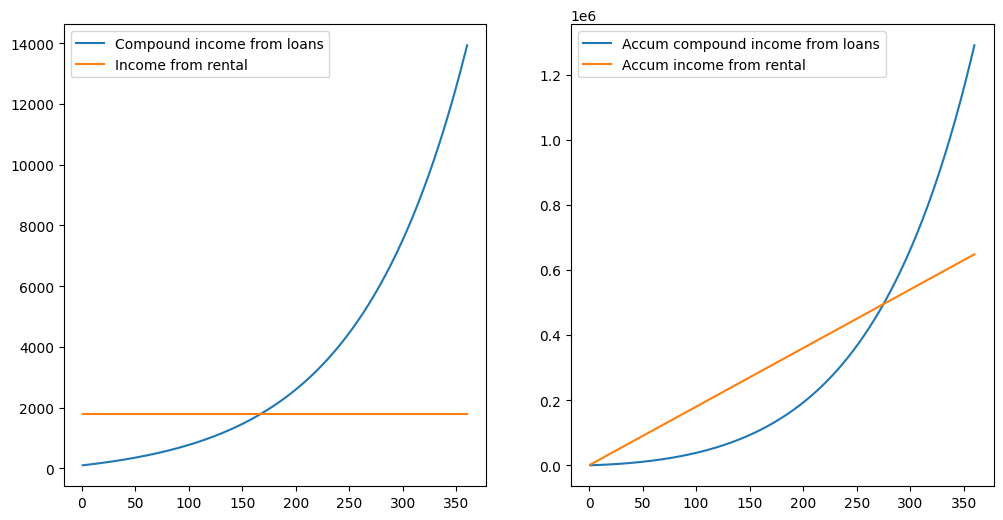

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(months, earnings, label="Compound income from loans")
plt.plot(months, rent_income, label="Income from rental")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(months, np.cumsum(earnings), label="Accum compound income from loans")
plt.plot(months, np.cumsum(rent_income), label="Accum income from rental")
plt.legend()

In [ ]:
np.cumsum(earnings)

array([1.00000000e+02, 2.04000000e+02, 3.12040000e+02, 4.24160400e+02,
       5.40402004e+02, 6.60806024e+02, 7.85414084e+02, 9.14268225e+02,
       1.04741091e+03, 1.18488502e+03, 1.32673387e+03, 1.47300121e+03,
       1.62373122e+03, 1.77896853e+03, 1.93875821e+03, 2.10314580e+03,
       2.27217725e+03, 2.44589903e+03, 2.62435802e+03, 2.80760160e+03,
       2.99567761e+03, 3.18863439e+03, 3.38652073e+03, 3.58938594e+03,
       3.79727980e+03, 4.01025260e+03, 4.22835512e+03, 4.45163868e+03,
       4.68015506e+03, 4.91395661e+03, 5.15309618e+03, 5.39762714e+03,
       5.64760341e+03, 5.90307945e+03, 6.16411024e+03, 6.43075134e+03,
       6.70305886e+03, 6.98108945e+03, 7.26490034e+03, 7.55454934e+03,
       7.85009484e+03, 8.15159579e+03, 8.45911174e+03, 8.77270286e+03,
       9.09242989e+03, 9.41835419e+03, 9.75053773e+03, 1.00890431e+04,
       1.04339335e+04, 1.07852729e+04, 1.11431256e+04, 1.15075569e+04,
       1.18786324e+04, 1.22564188e+04, 1.26409829e+04, 1.30323928e+04,
      

In [ ]:
scenarios = {}
years = np.arange(10, 50 + 15, 5)
rent_months = np.arange(600, 2000 + 100, 100)
principal_amount = 10_000
rois = np.arange(0.04, 0.12 + 0.01, 0.01)
yearly_contributions = 12 * np.arange(50, 300, 50)
freq = 12

for year in years:
    yearly_contribution = year * 12
    for rent_month in rent_months:
        for roi in rois:
            rent_accum = 0
            rent_accum_income = []
            rent_income = []
            for yearly_contribution in yearly_contributions:

                # Rental
                rent_income = np.repeat(rent_month, 12 * year)
                rent_accum_income = np.cumsum(rent_income)
                # Loan
                periodic_contribution = yearly_contribution / freq
                _, earnings = earning_by_time(principal_amount,
                                                        roi,
                                                        year,
                                                        freq,
                                                        yearly_contribution)
                month_equal_accum_income = np.abs(np.cumsum(earnings) - np.cumsum(rent_income)).argmin()
                year_equal_accum_income = month_equal_accum_income / 12

                scenarios[(year, rent_month, roi, yearly_contribution)] = month_equal_accum_income

In [ ]:
multi_index = pd.MultiIndex.from_tuples(list(scenarios.keys()), names=["years",
                                                                       "rental_income",
                                                                       "roi",
                                                                       "yearly_contribution"])
multi_index

MultiIndex([(10,  600,                0.04,  600),
            (10,  600,                0.04, 1200),
            (10,  600,                0.04, 1800),
            (10,  600,                0.04, 2400),
            (10,  600,                0.04, 3000),
            (10,  600,                0.05,  600),
            (10,  600,                0.05, 1200),
            (10,  600,                0.05, 1800),
            (10,  600,                0.05, 2400),
            (10,  600,                0.05, 3000),
            ...
            (60, 2000, 0.11000000000000001,  600),
            (60, 2000, 0.11000000000000001, 1200),
            (60, 2000, 0.11000000000000001, 1800),
            (60, 2000, 0.11000000000000001, 2400),
            (60, 2000, 0.11000000000000001, 3000),
            (60, 2000, 0.12000000000000002,  600),
            (60, 2000, 0.12000000000000002, 1200),
            (60, 2000, 0.12000000000000002, 1800),
            (60, 2000, 0.12000000000000002, 2400),
            (60

In [ ]:
scenarios_results = pd.DataFrame(data=list(scenarios.values()),
                                 index=multi_index,
                                 columns=["month_equal_accum_income"]). \
                                 replace(0, np.nan). \
                                 dropna(). \
                                 sort_values("month_equal_accum_income",
                                             ascending=True
                                             )

scenarios_results.shape, scenarios_results.head(10)

((2303, 1),
                                               month_equal_accum_income
 years rental_income roi  yearly_contribution                          
 35    600           0.12 3000                                    158.0
 15    600           0.12 3000                                    158.0
 60    600           0.12 3000                                    158.0
 50    600           0.12 3000                                    158.0
 45    600           0.12 3000                                    158.0
 55    600           0.12 3000                                    158.0
 30    600           0.12 3000                                    158.0
 25    600           0.12 3000                                    158.0
 40    600           0.12 3000                                    158.0
 20    600           0.12 3000                                    158.0)

In [ ]:
scenarios_results["equal_at_10_years"] = scenarios_results["month_equal_accum_income"].between(1, 10 * 12)
scenarios_results["equal_at_15_years"] = scenarios_results["month_equal_accum_income"].between(1, 15 * 12)
scenarios_results["equal_at_20_years"] = scenarios_results["month_equal_accum_income"].between(1, 20 * 12)
scenarios_results["equal_at_30_years"] = scenarios_results["month_equal_accum_income"].between(1, 30 * 12)
scenarios_results["equal_at_40_years"] = scenarios_results["month_equal_accum_income"].between(1, 40 * 12)
scenarios_results.head(10)

,,,,month_equal_accum_income,equal_at_10_years,equal_at_15_years,equal_at_20_years,equal_at_30_years,equal_at_40_years
years,rental_income,roi,yearly_contribution,,,,,,
35,600,0.12,3000,158.0,False,True,True,True,True
15,600,0.12,3000,158.0,False,True,True,True,True
60,600,0.12,3000,158.0,False,True,True,True,True
50,600,0.12,3000,158.0,False,True,True,True,True
45,600,0.12,3000,158.0,False,True,True,True,True
55,600,0.12,3000,158.0,False,True,True,True,True
30,600,0.12,3000,158.0,False,True,True,True,True
25,600,0.12,3000,158.0,False,True,True,True,True
40,600,0.12,3000,158.0,False,True,True,True,True


In [ ]:
scenarios_results.loc[(30, 1100)]

<ipython-input-21-3d98f948abd9>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  scenaries_results.loc[(30, 1100)]


month_equal_accum_income  equal_at_10_years  \
roi  yearly_contribution                                                
0.12 3000                                    229.0              False   
     2400                                    246.0              False   
0.11 3000                                    254.0              False   
0.12 1800                                    267.0              False   
0.11 2400                                    273.0              False   
0.12 1200                                    293.0              False   
0.10 2400                                    305.0              False   
0.09 3000                                    320.0              False   
0.11 1200                                    326.0              False   
0.12 600                                     327.0              False   
0.10 1800                                    332.0              False   
0.09 2400                                    345.0              False   

                          equal_at_15_years  equal_at_20_years  \
roi  yearly_contribution                                         
0.12 3000                             False               True   
     2400                             False              False   
0.11 3000                             False              False   
0.12 1800                             False              False   
0.11 2400                             False              False   
0.12 1200                             False              False   
0.10 2400                             False              False   
0.09 3000                             False              False   
0.11 1200                             False              False   
0.12 600                              False              False   
0.10 1800                             False              False   
0.09 2400                             False              False   

                          equal_at_30_years  equal_at_40_years  
roi  yearly_contribution                                        
0.12 3000                              True               True  
     2400                              True               True  
0.11 3000                              True               True  
0.12 1800                              True               True  
0.11 2400                              True               True  
0.12 1200                              True               True  
0.10 2400                              True               True  
0.09 3000                              True               True  
0.11 1200                              True               True  
0.12 600                               True               True  
0.10 1800                              True               True  
0.09 2400                              True               True

In [ ]:
100 * scenarios_results.mean(axis=0)

month_equal_accum_income    35943.508467
equal_at_10_years               0.000000
equal_at_15_years               1.736865
equal_at_20_years              12.592271
equal_at_30_years              57.056014
equal_at_40_years              85.931394
dtype: float64

In [ ]:
scenarios_results.loc[scenarios_results["equal_at_15_years"]]

,,,,month_equal_accum_income,equal_at_10_years,equal_at_15_years,equal_at_20_years,equal_at_30_years,equal_at_40_years
years,rental_income,roi,yearly_contribution,,,,,,
35,600,0.12,3000,158.0,False,True,True,True,True
15,600,0.12,3000,158.0,False,True,True,True,True
60,600,0.12,3000,158.0,False,True,True,True,True
50,600,0.12,3000,158.0,False,True,True,True,True
45,600,0.12,3000,158.0,False,True,True,True,True
55,600,0.12,3000,158.0,False,True,True,True,True
30,600,0.12,3000,158.0,False,True,True,True,True
25,600,0.12,3000,158.0,False,True,True,True,True
40,600,0.12,3000,158.0,False,True,True,True,True


## Parameter-Driven Earnings Analysis

In [ ]:
# Calculation of composed return. Composed return function
principal_amount = 10_000
yearly_contribution = 4800 # 100 * 12
roi = 0.1
years = 30
freq = 1
periodic_contribution = yearly_contribution / freq

composed_return(principal_amount, yearly_contribution, roi, years, freq, True)

In [ ]:
np.linspace(0.04, 0.12, 5)

array([0.04, 0.06, 0.08, 0.1 , 0.12])

In [ ]:
scenarios = {}
investors = [5, 10, 15, 20]
years = 30
principal_amount = 10_000
rois = np.linspace(0.04, 0.12, 5)
yearly_contributions = 12 * 250 #np.arange(50, 300, 50)
freq = 12


for n_investors in investors:
    yearly_contribution = n_investors * years * 12
    for roi in rois:
        #periodic_contribution = yearly_contribution / freq
        income_and_earning, earnings = earning_by_time(principal_amount,
                                                       roi,
                                                       years,
                                                       freq,
                                                       yearly_contribution)
        scenarios[(n_investors, roi, yearly_contribution)] = income_and_earning

In [ ]:
multi_idx = pd.MultiIndex.from_tuples(scenarios.keys(),
                                      names=("investors", "roi", "y_contrib")
                                     )
df = pd.DataFrame(scenarios.values(),
                  columns=["total_amount"],
                  index=multi_idx)
df.head()

total_amount
investors roi  y_contrib               
5         0.04 1800       137242.390803
          0.06 1800       210903.008491
          0.08 1800       332911.213877
          0.10 1800       537447.182452
          0.12 1800       883741.033192

In [ ]:
max_roi = df.index.get_level_values(1).max()
df.loc[pd.IndexSlice[:, max_roi, :]]

,,total_amount
investors,y_contrib,
5,1800,8.837410e+05
10,3600,1.407986e+06
15,5400,1.932230e+06
20,7200,2.456475e+06


<Axes: xlabel='investors', ylabel='total_amount'>

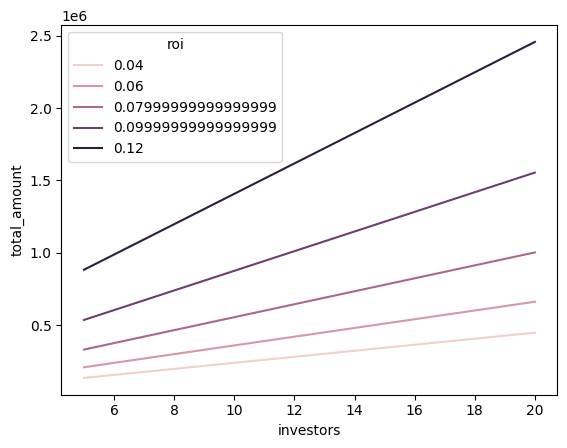

In [ ]:
df_investors = df.reset_index(level=(0, 1))
sns.lineplot(data=df_investors, x="investors", y="total_amount", hue="roi")

<Axes: xlabel='roi', ylabel='total_amount'>

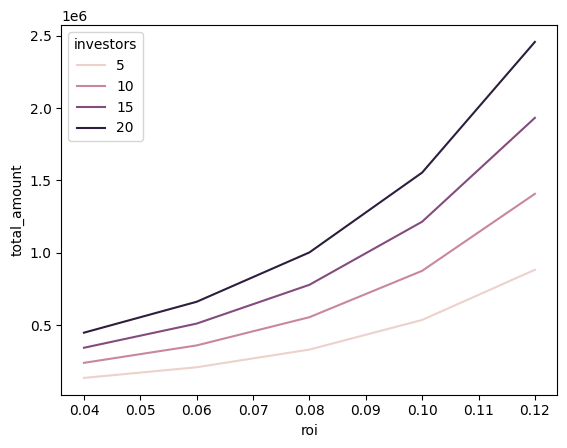

In [ ]:
sns.lineplot(data=df_investors, x="roi", y="total_amount", hue="investors")

<Axes: xlabel='roi', ylabel='total_amount'>

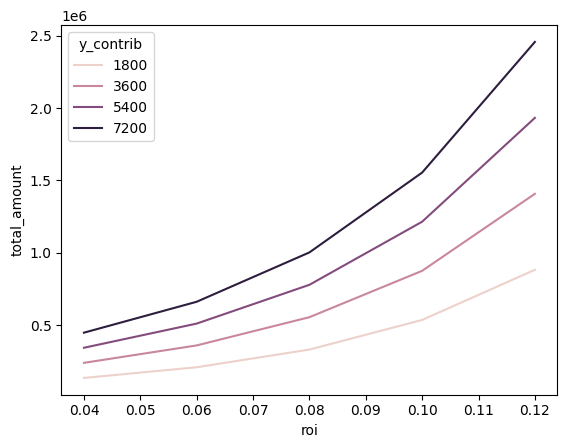

In [ ]:
df_investors = df.reset_index(level=(1, 2))
sns.lineplot(data=df_investors, x="roi", y="total_amount", hue="y_contrib")

We see that *roi* is the best way to leverage the exponential behaviour of the
total amount